# Amy Siskind's Lists

Ms. Siskind creates a weekly list that she posts on medium.  She posts the lists to her facebook and twitter accounts.

This notebook harvests those lists and performs whatever analysis that I can think of.

# Harvest the Lists

## List of Links to Harvest

When she posted the latest lists she posts the google short links to the other list.  This seemed to be the best way to get at the url to each list.

*Please note that week 41 is my (MisoMunje's) google shorterned link. When you click on a shortened link, google redirects you to the longer link.  Note that google also collects information on you and where you are going when it does this. I don't know what information google provides to the shortener (wk41 me, <wk41 Ms. Siskind?).*

In [1]:
asLinks="""
Week 1: https://goo.gl/KWlyOO Week 2: https://goo.gl/Pn7MFs
Week 3: https://goo.gl/CZwxsX Week 4: https://goo.gl/JhwuON
Week 5: https://goo.gl/TGM6x8 Week 6: https://goo.gl/uhyjxe
Week 7: https://goo.gl/bMdhTG Week 8: https://goo.gl/89MW8h
Week 9: https://goo.gl/ekv9wE Week 10: https://goo.gl/RETyH1
Week 11: https://goo.gl/6cs0tt Week 12: https://goo.gl/bRMx5o
Week 13: https://goo.gl/xzdjyY Week 14: https://goo.gl/1HwN4H
Week 15: https://goo.gl/JxVghS Week 16: https://goo.gl/sZpudG
Week 17: https://goo.gl/QymWmJ Week 18: https://goo.gl/Ri6E9N
Week 19: https://goo.gl/L6JOSV Week 20: https://goo.gl/PvlahQ
Week 21: https://goo.gl/XDjZFw Week 22: https://goo.gl/AQydgj
Week 23: https://goo.gl/FlWS69 Week 24: https://goo.gl/O2c7Th
Week 25:https://goo.gl/bJi31u Week 26: https://goo.gl/KhFQ7Y
Week 27: https://goo.gl/6Kgby0 Week 28: https://goo.gl/teZ4i4
Week 29: https://goo.gl/HKaBbO Week 30: https://goo.gl/FJqUBe 
Week 31: https://goo.gl/17cXD4 Week 32: https://goo.gl/7ZW7hJ
Week 33: https://goo.gl/qoXSqG Week 34: https://goo.gl/CHsG4A
Week 35: https://goo.gl/Mj2fES Week 36: https://goo.gl/YeHCo1
Week 37: https://goo.gl/bTEMQ4 Week 38: https://goo.gl/onxULz
Week 39: https://goo.gl/uChJHT Week 40: https://goo.gl/sFdRQ6
Week 41: https://goo.gl/mZpaFA Week 42: https://goo.gl/sFdRQ6
"""

To turn this into a list of urls, let us use python's regular expression library.  We scan the string for anything matching the pattern ```pat```.  A bit of quick list comprehension to capture the week as an integer.

In [2]:
import re
pat="Week (\d+): *(https://goo.gl/......)"
wkLinkArray=[ [int(wk),link] for wk,link in re.findall(pat,asLinks)]

The first 5 elements of our list.

In [3]:
wkLinkArray[:7]

[[1, 'https://goo.gl/KWlyOO'],
 [2, 'https://goo.gl/Pn7MFs'],
 [3, 'https://goo.gl/CZwxsX'],
 [4, 'https://goo.gl/JhwuON'],
 [5, 'https://goo.gl/TGM6x8'],
 [6, 'https://goo.gl/uhyjxe'],
 [7, 'https://goo.gl/bMdhTG']]

## Harvesting

Here each link is pulled from the url and the python library ```bs4``` (beautifulSoup) is used to parse the list elements.

The goal is to get a list of python dictionaries and feed it to python's ```pandas```. (Sounds weird doesn't it). Ultimately, we will have a ```pandas.DataFrame```.

In [4]:
%matplotlib notebook

In [5]:
import bs4
import pandas as pd
import requests

There is probably an elegant way to do this but I am just going to bang this out.  At least the week number will be printed out as the for loop executes.  Enjoy -- it is very hacker-esh.

In [6]:
da=[]
print("Fetching:")
pPat='(\d+)\. |^16 '

for wk,turl in wkLinkArray:
    dw={'wk':wk,'url':turl,}
    res=requests.get(turl)
    bs=bs4.BeautifulSoup(res.text,"lxml")
    grafs=bs.findAll('li',{'class':'graf'})
    if len(grafs)==0:
        grafs=[ g for g in bs.findAll('p',{'class':'graf'}) if re.search(pPat,g.text)]
    print("  {:02d}-{:03d}".format(wk,len(grafs)),end='')
    if wk%5==0: print()
    for n,g in enumerate(grafs):
        if n==0 and 'published' in g.text.lower(): continue
        diw=dw.copy()
        diw['n']=n
        diw['text']=g.text
        links=list(map(lambda x: str(x),g.findAll('<a>')))
        diw['links']=' | '.join(links)
        da.append(diw)        

asdf=pd.DataFrame(da)

Fetching:
  01-009  02-018  03-026  04-022  05-020
  06-017  07-017  08-028  09-036  10-041
  11-050  12-057  13-052  14-065  15-066
  16-064  17-064  18-066  19-067  20-075
  21-067  22-070  23-063  24-067  25-073
  26-093  27-105  28-093  29-080  30-078
  31-085  32-082  33-089  34-096  35-106
  36-095  37-110  38-110  39-101  40-106
  41-108  42-106

We have a pandas dataframe.

In [7]:
asdf[:5]

,links,n,text,url,wk
0,,0,"Acts of hate — for the first 400 per SPLC, I c...",https://goo.gl/KWlyOO,1
1,,1,Reporters critique their own paper’s coverage ...,https://goo.gl/KWlyOO,1
2,,2,A president-elect is openly (on Twitter!) tryi...,https://goo.gl/KWlyOO,1
3,,3,"The media, including traditional media, covere...",https://goo.gl/KWlyOO,1
4,,4,Major media following Trump’s reality show sto...,https://goo.gl/KWlyOO,1


In [8]:
print("Don't worry MisoMunje, there are")
print("only {} authoritarian notable items".format(len(asdf)))
print("in {} weeks.".format(max(asdf['wk'])))

Don't worry MisoMunje, there are
only 2843 authoritarian notable items
in 42 weeks.


## Wrangle it

The week number is when Amy Siskind started her list.  Looks like week 1 corresponds to the week that ends 2016-11-19 (Saturday). The first week was published on Sunday 2016-11-20.  ISO weeks end on Sunday but I am guessing that Amy Siskind believes the week ends on Saturday like most normal people.  Anyway, let's get the weekend date.

In [9]:
import datetime as dt
listStart=dt.datetime(2016,11,19)
dwk=dt.timedelta(days=7)
asdf['WkEnd']=asdf.apply(lambda x: listStart+dwk*(x.wk-1),axis=1)

# Analyze

OK, we have the data.  Now what do we see. I will add sections to this part periodically.

## Number items per week

One simple measure of whether things are getting better or worse. Let's just count items each week.

<IPython.core.display.Javascript object>


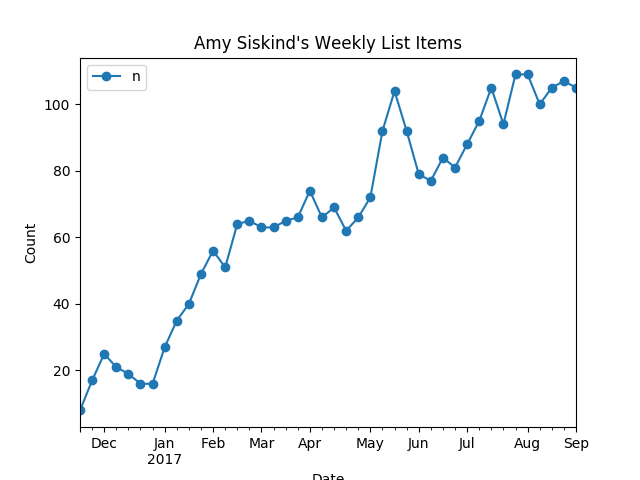

In [10]:
f=asdf.groupby('wk').max().plot(x='WkEnd',y='n',marker='o')
f.axes.set_xlabel('Date');f.axes.set_ylabel('Count')
f.set_title("Amy Siskind's Weekly List Items")